<a href="https://colab.research.google.com/github/nukko0529/artificialIntelligence/blob/main/1202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ライブラリの読み込み
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [2]:
# MNISTデータセットの読み込み
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [3]:
# 画素の値を0~1のfloat型に
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

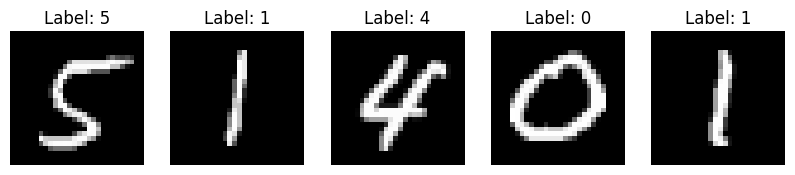

In [4]:
# データサンプルの確認
def display_sample_images(images, labels, num_samples=5):
  indices = np.random.choice(images.shape[0], num_samples, replace=False)
  sample_images = images[indices]
  sample_labels = labels[indices]

  plt.figure(figsize=(10, 2))
  for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {sample_labels[i]}")
    plt.axis('off')
  plt.show()

display_sample_images(train_images, train_labels)

In [5]:
# モデルの構築
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# モデルのコンパイル
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
# EarlyStoppingコールバックの設定
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [8]:
# モデルの訓練
# まずは100個の情報を学習してみる
history = model.fit(train_images[:100], train_labels[:100], epochs=100, validation_data=(test_images, test_labels), callbacks=[early_stopping])

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 305ms/step - accuracy: 0.0613 - loss: 2.3341 - val_accuracy: 0.1088 - val_loss: 2.3387
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.1050 - loss: 2.2718 - val_accuracy: 0.1250 - val_loss: 2.3101
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.1824 - loss: 2.2233 - val_accuracy: 0.1287 - val_loss: 2.2918
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.1790 - loss: 2.1730 - val_accuracy: 0.1381 - val_loss: 2.2756
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.2128 - loss: 2.1364 - val_accuracy: 0.1580 - val_loss: 2.2588
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 0.2875 - loss: 2.0780 - val_accuracy: 0.1848 - val_loss: 2.2382
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.3984 - loss: 2.0167 - val_accuracy: 0.2253 - val_loss: 2.2078
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - accuracy: 0.4783 - loss: 1.9605 - val_accuracy: 0.2737 - v

In [9]:
# モデルの評価
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")

313/313 - 0s - 1ms/step - accuracy: 0.5945 - loss: 1.4023

Test accuracy: 0.5945000052452087


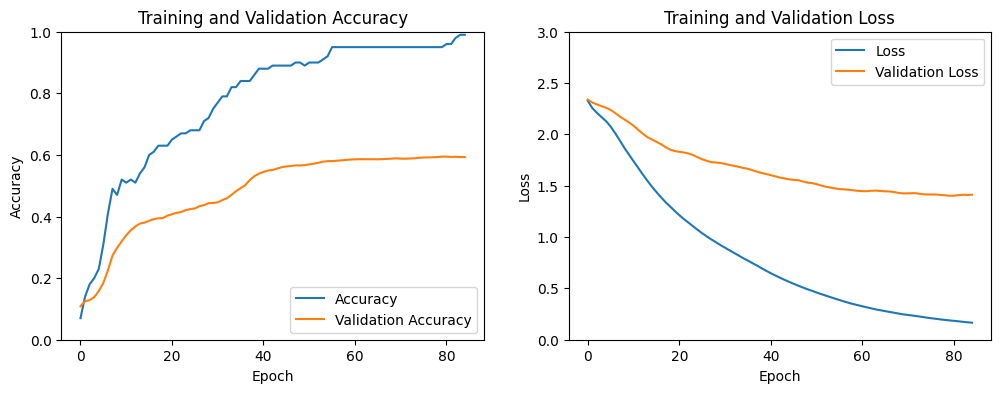

In [10]:
# 訓練と検証の精度と損失のプロット
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

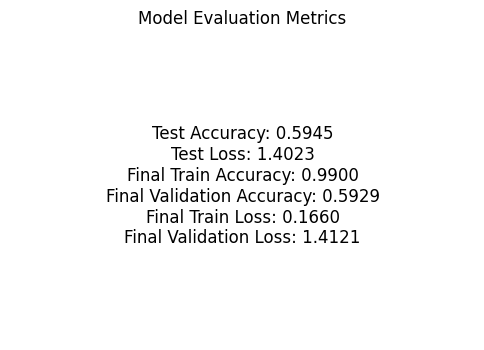

In [11]:
# 評価結果の表示画像
plt.figure(figsize=(6, 4))
plt.axis('off')

metrics_text = (
    f"Test Accuracy: {test_acc:.4f}\n"
    f"Test Loss: {test_loss:.4f}\n"
    f"Final Train Accuracy: {history.history['accuracy'][-1]:.4f}\n"
    f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}\n"
    f"Final Train Loss: {history.history['loss'][-1]:.4f}\n"
    f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}"
)

plt.text(0.5, 0.5, metrics_text, fontsize=12, va='center', ha='center')
plt.title("Model Evaluation Metrics")
plt.show()